# 젊은 연령층의 고혈압
**13 일석이조[김진비, 박선혜, 천예은]**

# 1. 주제

- 주제
    - 고혈압
        - 수축기 혈압 140mmHg 이상 또는 이완기 혈압 90mmHg 이상일 때 진단.
        - 고령층의 질환, 가족력이 강한 질환이라는 인식이 강한 만성질환.
    - 주제 선정 이유
        - 시대의 변화와 코로나19로 인한 젊은 연령층의 신체활동의 감소가 실제로 젊은 연령층의 고혈압에 큰 영향을 끼치는 요인인지 파악하고, 가족력이 있더라도 운동 등을 통해 충분히 예방할 수 있는 질환인지에 대한 의문을 해결해보고자 해당 주제를 선정했다.

- 연구 주제 및 가설
    - `만 12세 이상부터 만 39세 이상의 사람들은 앉아서 보내는 시간이 길수록 혈압 수치가 높은가?`

# 2. 데이터

- 데이터
    - 2020년도 질병관리청에서 실시한 국민건강영양조사 결과

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

## 2.1. 데이터 불러오기

In [2]:
df, meta = pyreadstat.read_sav("HN20_ALL.sav")

In [3]:
df

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,2022.08.10.,A801169401,A8011694,2020.0,1.0,1.0,2.0,A801,1.0,39.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
1,2022.08.10.,A801169402,A8011694,2020.0,1.0,1.0,2.0,A801,2.0,39.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
2,2022.08.10.,A801169403,A8011694,2020.0,1.0,1.0,2.0,A801,1.0,10.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
3,2022.08.10.,A801169404,A8011694,2020.0,1.0,1.0,2.0,A801,1.0,7.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
4,2022.08.10.,A801169405,A8011694,2020.0,1.0,1.0,2.0,A801,1.0,4.0,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,2022.08.10.,R804366601,R8043666,2020.0,8.0,1.0,2.0,R804,2.0,61.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
7355,2022.08.10.,R804368301,R8043683,2020.0,8.0,1.0,2.0,R804,2.0,51.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
7356,2022.08.10.,R804368302,R8043683,2020.0,8.0,1.0,2.0,R804,2.0,24.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
7357,2022.08.10.,R804371701,R8043717,2020.0,8.0,1.0,2.0,R804,1.0,65.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0


## 2.2. 필요한 데이터 선별하기

### 2.2.1. column 선별
- 가족력(3)
    - `HE_HPfh1` : 부의 고혈압 진단여부[2]
    - `HE_HPfh2` : 모의 고혈압 진단여부[2]
    - `HE_HPfh3` : 형제자매의 고혈압 진단여부[3]
- 개인정보(5)
    - `sex` : 성별[2]
    - `age` : 나이
    - `HE_wc` : 허리둘레
    - `HE_BMI`, : BMI
    - `occp` : 직업분야[7]
- 생활습관(11)
    - `BP16_1` : 주중 하루평균 수면시간
    - `BP16_2` : 주말 하루평균 수면시간
    - `BE8_1` : 하루평균 앉아서 보내는 시간
    - `HE_fst` : 공복 시간
    - `L_OUT_FQ` : 외식횟수[7]
    - `N_WAT_C` : 물섭취량(컵)
    - `BS10_3` : (청소년) 1달간 하루흡연량
    - `BS3_2` : (성인) 하루평균 일반담배(궐련) 흡연량
    - `BS12_47_1` : (성인) 하루평균 전자담배(궐련) 흡연량
    - `BD1_11` : 1년간 음주빈도
    - `BD2_1` : 한번에 마시는 음주량
- 혈압수치(3)
    - `HE_sbp1` : 1차 수축기 혈압 수치
    - `HE_sbp2` : 2차 수축기 혈압 수치
    - `HE_sbp3` : 3차 수축기 혈압 수치

*변수[n] : n개의 범주를 가진 범주형 변수

In [4]:
data = df[['HE_HPfh1','HE_HPfh2','HE_HPfh3','sex','age','HE_wc','HE_BMI', 'occp',
           'BP16_1','BP16_2','BE8_1','HE_fst','L_OUT_FQ','N_WAT_C','BS10_3',
           'BS3_2','BS12_47_1','BD1_11','BD2_1','HE_sbp1','HE_sbp2','HE_sbp3']]

### 2.2.2. data 선별
- 연구 주제와 같이 만 12세 이상부터 만 39세까지의 데이터만 이용.

In [5]:
data = data.query('12 <= age <= 39')

In [6]:
data

,HE_HPfh1,HE_HPfh2,HE_HPfh3,sex,age,HE_wc,HE_BMI,occp,BP16_1,BP16_2,...,L_OUT_FQ,N_WAT_C,BS10_3,BS3_2,BS12_47_1,BD1_11,BD2_1,HE_sbp1,HE_sbp2,HE_sbp3
0,0.0,0.0,0.0,1.0,39.0,85.8,24.185489,2.0,6.0,7.0,...,3.0,10.0,888.0,888.0,888.0,3.0,3.0,118.0,118.0,114.0
1,0.0,0.0,0.0,2.0,39.0,68.0,17.935939,2.0,7.0,7.0,...,5.0,1.0,888.0,888.0,888.0,1.0,8.0,96.0,96.0,96.0
9,0.0,0.0,0.0,1.0,20.0,81.3,20.843308,7.0,10.0,12.0,...,NaN,NaN,888.0,6.0,888.0,4.0,5.0,102.0,100.0,104.0
10,0.0,0.0,0.0,1.0,24.0,74.9,21.041694,7.0,4.0,10.0,...,1.0,3.5,888.0,888.0,888.0,4.0,5.0,102.0,102.0,116.0
13,0.0,0.0,0.0,2.0,12.0,66.5,16.544520,NaN,9.0,9.0,...,3.0,3.0,888.0,888.0,888.0,8.0,8.0,108.0,116.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,1.0,0.0,0.0,1.0,39.0,82.4,23.381186,2.0,8.0,8.0,...,2.0,4.0,888.0,888.0,888.0,3.0,3.0,114.0,110.0,118.0
7347,0.0,0.0,0.0,2.0,39.0,67.7,19.101562,7.0,8.0,9.0,...,5.0,5.0,888.0,888.0,888.0,2.0,1.0,104.0,102.0,102.0
7350,0.0,0.0,0.0,2.0,30.0,97.6,29.159847,1.0,5.0,5.0,...,3.0,5.0,888.0,888.0,888.0,3.0,1.0,124.0,120.0,116.0
7353,0.0,0.0,8.0,2.0,26.0,59.4,17.570804,1.0,6.0,8.0,...,2.0,2.5,888.0,888.0,888.0,3.0,2.0,108.0,104.0,102.0


## 2.3. EDA

### 2.3.1. 범주형 변수 category로 dtype 변경

In [7]:
cat_col = ['HE_HPfh1', 'HE_HPfh2', 'HE_HPfh3', 'sex', 'occp', 'L_OUT_FQ']
cat_dic = {}
for col in cat_col:
    cat_dic[col] = 'category'
data = data.astype(cat_dic)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 7356
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   HE_HPfh1   1992 non-null   category
 1   HE_HPfh2   1992 non-null   category
 2   HE_HPfh3   1992 non-null   category
 3   sex        2099 non-null   category
 4   age        2099 non-null   float64 
 5   HE_wc      1981 non-null   float64 
 6   HE_BMI     1990 non-null   float64 
 7   occp       1722 non-null   category
 8   BP16_1     2000 non-null   float64 
 9   BP16_2     2000 non-null   float64 
 10  BE8_1      2000 non-null   float64 
 11  HE_fst     1965 non-null   float64 
 12  L_OUT_FQ   1606 non-null   category
 13  N_WAT_C    1606 non-null   float64 
 14  BS10_3     2000 non-null   float64 
 15  BS3_2      2000 non-null   float64 
 16  BS12_47_1  2000 non-null   float64 
 17  BD1_11     2000 non-null   float64 
 18  BD2_1      2000 non-null   float64 
 19  HE_sbp1    1953 non-null   

### 2.3.2. 결측치 처리

#### 1. 종속변수 결측치 처리

In [9]:
data = data.dropna(subset = ['HE_sbp1', 'HE_sbp2', 'HE_sbp3'], axis = 0).reset_index().drop(['index'], axis = 1)

In [10]:
data['HE_sbp'] = np.mean([data['HE_sbp1'], data['HE_sbp2'], data['HE_sbp3']], axis = 0)

In [11]:
data = data.drop(labels=['HE_sbp1', 'HE_sbp2', 'HE_sbp3'], axis = 1)

In [12]:
data.head()

,HE_HPfh1,HE_HPfh2,HE_HPfh3,sex,age,HE_wc,HE_BMI,occp,BP16_1,BP16_2,BE8_1,HE_fst,L_OUT_FQ,N_WAT_C,BS10_3,BS3_2,BS12_47_1,BD1_11,BD2_1,HE_sbp
0,0.0,0.0,0.0,1.0,39.0,85.8,24.185489,2.0,6.0,7.0,10.0,13.0,3.0,10.0,888.0,888.0,888.0,3.0,3.0,116.666667
1,0.0,0.0,0.0,2.0,39.0,68.0,17.935939,2.0,7.0,7.0,11.0,13.0,5.0,1.0,888.0,888.0,888.0,1.0,8.0,96.000000
2,0.0,0.0,0.0,1.0,20.0,81.3,20.843308,7.0,10.0,12.0,12.0,13.0,NaN,NaN,888.0,6.0,888.0,4.0,5.0,102.000000
3,0.0,0.0,0.0,1.0,24.0,74.9,21.041694,7.0,4.0,10.0,10.0,9.0,1.0,3.5,888.0,888.0,888.0,4.0,5.0,106.666667
4,0.0,0.0,0.0,2.0,12.0,66.5,16.544520,NaN,9.0,9.0,9.0,13.0,3.0,3.0,888.0,888.0,888.0,8.0,8.0,108.666667


#### 2. '모름/무응답' 처리
- '모름/무응답'에 해당하는 9, 99, 999를 NaN값으로 대체.

In [13]:
data = data.replace(9,np.nan)
data = data.replace(99,np.nan)
data = data.replace(999,np.nan)

In [14]:
data = data.dropna().reset_index().drop(['index'], axis = 1)
data

,HE_HPfh1,HE_HPfh2,HE_HPfh3,sex,age,HE_wc,HE_BMI,occp,BP16_1,BP16_2,BE8_1,HE_fst,L_OUT_FQ,N_WAT_C,BS10_3,BS3_2,BS12_47_1,BD1_11,BD2_1,HE_sbp
0,0.0,0.0,0.0,1.0,39.0,85.8,24.185489,2.0,6.0,7.0,10.0,13.0,3.0,10.0,888.0,888.0,888.0,3.0,3.0,116.666667
1,0.0,0.0,0.0,2.0,39.0,68.0,17.935939,2.0,7.0,7.0,11.0,13.0,5.0,1.0,888.0,888.0,888.0,1.0,8.0,96.000000
2,0.0,0.0,0.0,1.0,18.0,63.5,16.398308,7.0,7.0,10.0,13.0,15.0,1.0,4.0,888.0,888.0,888.0,4.0,1.0,133.333333
3,0.0,0.0,0.0,2.0,39.0,68.5,18.940652,2.0,7.0,7.0,10.0,3.0,4.0,2.0,888.0,888.0,888.0,2.0,2.0,104.666667
4,1.0,0.0,0.0,1.0,28.0,96.5,27.685459,7.0,6.0,8.0,14.0,12.0,1.0,50.0,888.0,888.0,888.0,4.0,5.0,106.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,1.0,0.0,0.0,1.0,31.0,79.2,21.916303,6.0,6.0,6.0,12.0,18.0,4.0,10.0,888.0,20.0,888.0,2.0,1.0,104.666667
963,1.0,0.0,0.0,1.0,39.0,82.4,23.381186,2.0,8.0,8.0,13.0,15.0,2.0,4.0,888.0,888.0,888.0,3.0,3.0,114.000000
964,0.0,0.0,0.0,2.0,30.0,97.6,29.159847,1.0,5.0,5.0,10.0,15.0,3.0,5.0,888.0,888.0,888.0,3.0,1.0,120.000000
965,0.0,0.0,8.0,2.0,26.0,59.4,17.570804,1.0,6.0,8.0,12.0,12.0,2.0,2.5,888.0,888.0,888.0,3.0,2.0,104.666667


### 2.3.3. 변수 처리

#### 1. 하루평균흡연량 변수 처리
- 아래와 같이 세 개로 나뉜 하루평균 흡연량 변수를 하루평균 흡연량에 해당하는 `smoke` 변수로 통합.
    - `BS10_3` : (청소년) 1달간 하루흡연량
    - `BS3_2` : (성인) 하루평균 일반담배(궐련) 흡연량
    - `BS12_47_1` : (성인) 하루평균 전자담배(궐련) 흡연량

- '비해당'에 해당하는 888은 0으로 대체

In [15]:
data.insert(loc=19, column='smoke', value=np.nan)
for i in range(len(data)):
    if data.loc[i, 'age'] >= 12 and data.loc[i, 'age'] <= 18:
        if data.loc[i, 'BS10_3'] == 888.0:
            data.loc[i, 'smoke'] = 0.0
        else:
            data.loc[i, 'smoke'] = data.loc[i, 'BS10_3']
    else:
        if data.loc[i, 'BS3_2'] == 888.0 and data.loc[i, 'BS12_47_1'] == 888.0:
            data.loc[i, 'smoke'] = 0.0
        elif data.loc[i, 'BS3_2'] != 888.0 and data.loc[i, 'BS12_47_1'] == 888.0:
            data.loc[i, 'smoke'] = data.loc[i, 'BS3_2']
        elif data.loc[i, 'BS3_2'] == 888.0 and data.loc[i, 'BS12_47_1'] != 888.0:
            data.loc[i, 'smoke'] = data.loc[i, 'BS12_47_1']
        else:
            data.loc[i, 'smoke'] = data.loc[i, 'BS3_2'] + data.loc[i, 'BS12_47_1']

In [16]:
data = data.drop(labels=['BS10_3', 'BS3_2', 'BS12_47_1'], axis = 1)

#### 2. 음주 관련 변수 처리
- `BD1_11`(1년간 음주빈도), `BD2_1`(한 번에 마시는 음주량 변수)에서 '비해당'에 대항하는 8을 0으로 대체.

In [17]:
data['BD1_11'] = [0.0 if d == 8 else d for d in data['BD1_11']]
data['BD2_1'] = [0.0 if d == 8 else d for d in data['BD2_1']]

In [18]:
data.head(3)

,HE_HPfh1,HE_HPfh2,HE_HPfh3,sex,age,HE_wc,HE_BMI,occp,BP16_1,BP16_2,BE8_1,HE_fst,L_OUT_FQ,N_WAT_C,BD1_11,BD2_1,smoke,HE_sbp
0,0.0,0.0,0.0,1.0,39.0,85.8,24.185489,2.0,6.0,7.0,10.0,13.0,3.0,10.0,3.0,3.0,0.0,116.666667
1,0.0,0.0,0.0,2.0,39.0,68.0,17.935939,2.0,7.0,7.0,11.0,13.0,5.0,1.0,1.0,0.0,0.0,96.000000
2,0.0,0.0,0.0,1.0,18.0,63.5,16.398308,7.0,7.0,10.0,13.0,15.0,1.0,4.0,4.0,1.0,0.0,133.333333


### 2.3.4. 이상치 처리

#### 1. 수치형 변수

In [19]:
num_col = []
for col in data.columns[:-1]:
    if (data[col].dtype != 'category'):
        num_col.append(col)

- 처리 전 산점도

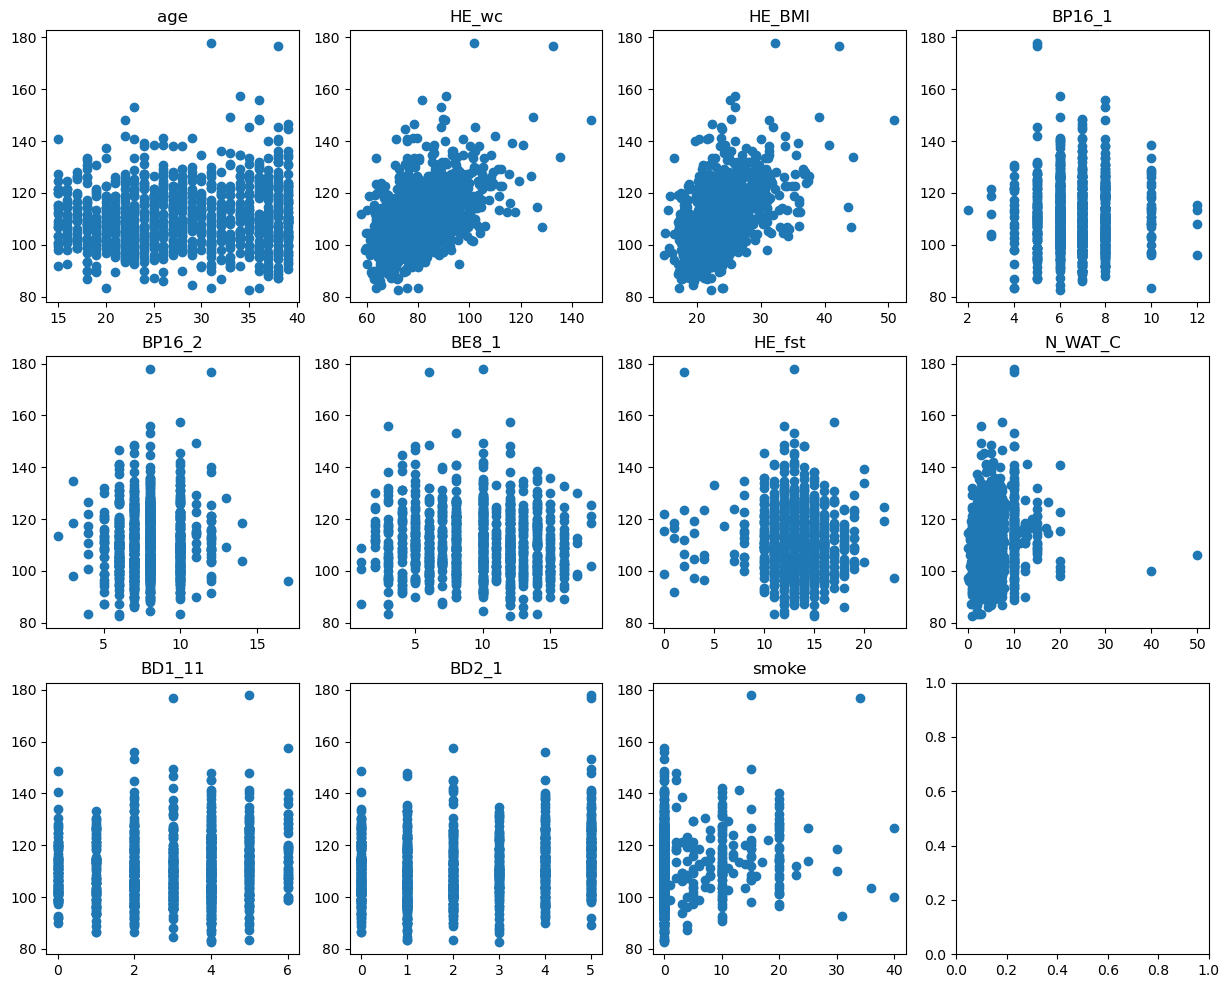

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
for i in range(len(num_col)):
    axes[i//4,i%4].scatter(data[num_col].iloc[:,i], data.loc[:,'HE_sbp'])
    axes[i//4,i%4].set_title(num_col[i])
plt.show()

- boxplot

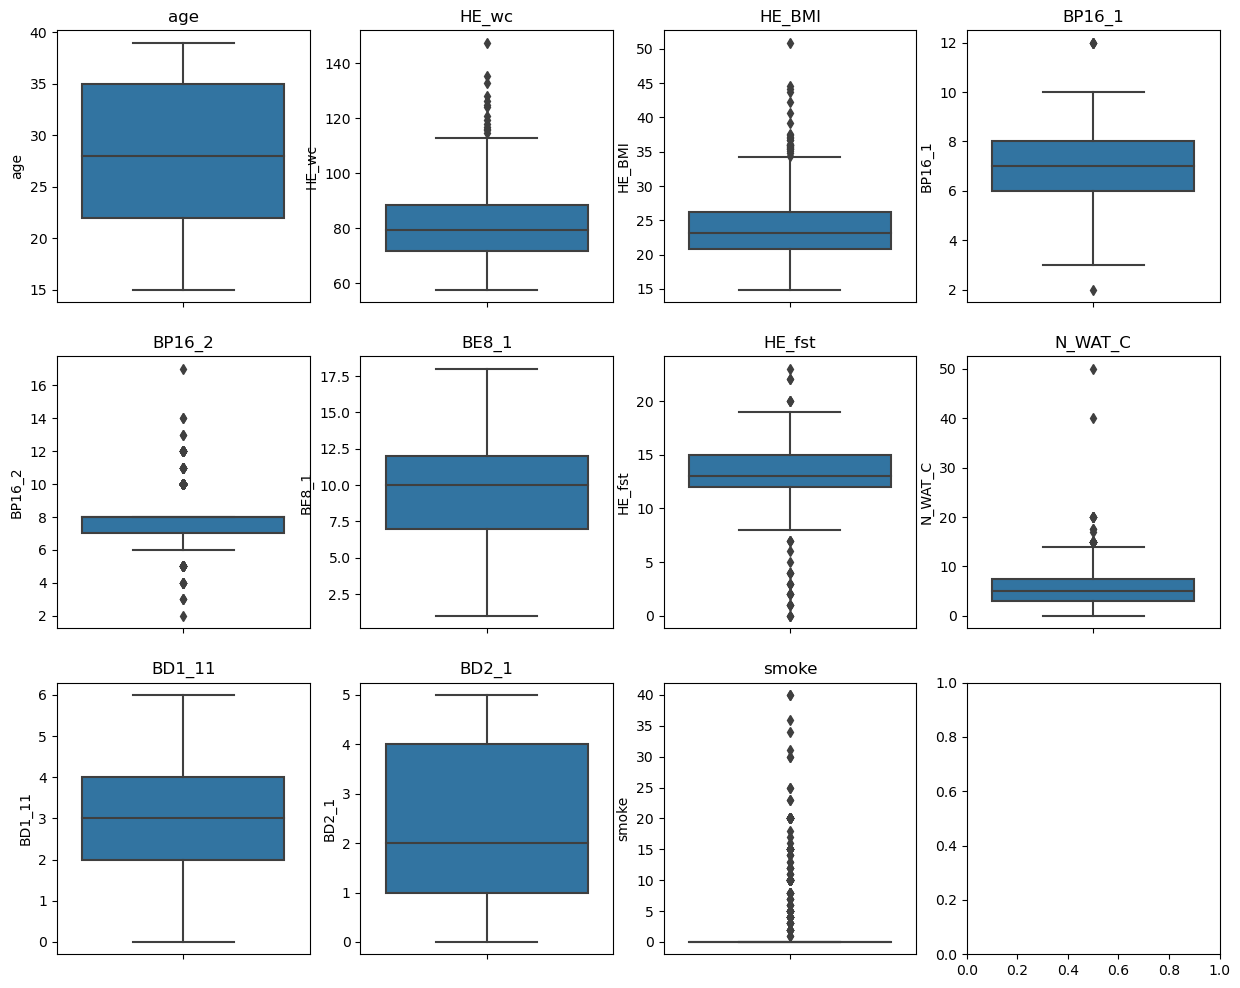

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
for i in range(len(num_col)):
    sns.boxplot(data = data , y = data[num_col[i]], ax = axes[i//4,i%4])
    axes[i//4,i%4].set_title(num_col[i])
plt.show()

- 이상치 데이터 확인 및 처리

In [22]:
data.query('N_WAT_C >= 30')

,HE_HPfh1,HE_HPfh2,HE_HPfh3,sex,age,HE_wc,HE_BMI,occp,BP16_1,BP16_2,BE8_1,HE_fst,L_OUT_FQ,N_WAT_C,BD1_11,BD2_1,smoke,HE_sbp
4,1.0,0.0,0.0,1.0,28.0,96.5,27.685459,7.0,6.0,8.0,14.0,12.0,1.0,50.0,4.0,5.0,0.0,106.0
134,0.0,0.0,0.0,2.0,25.0,67.5,21.683870,7.0,7.0,7.0,14.0,15.0,2.0,40.0,3.0,2.0,40.0,100.0


In [23]:
data.query('HE_sbp>170')

,HE_HPfh1,HE_HPfh2,HE_HPfh3,sex,age,HE_wc,HE_BMI,occp,BP16_1,BP16_2,BE8_1,HE_fst,L_OUT_FQ,N_WAT_C,BD1_11,BD2_1,smoke,HE_sbp
10,0.0,0.0,0.0,1.0,31.0,101.6,32.229464,2.0,5.0,8.0,10.0,13.0,1.0,10.0,5.0,5.0,15.0,178.000000
960,0.0,0.0,0.0,1.0,38.0,132.8,42.290183,2.0,5.0,12.0,6.0,2.0,1.0,10.0,3.0,5.0,34.0,176.666667


In [24]:
data = data.query('N_WAT_C <= 30 and HE_sbp <= 170')
data.shape

(963, 18)

- 처리 후 산점도

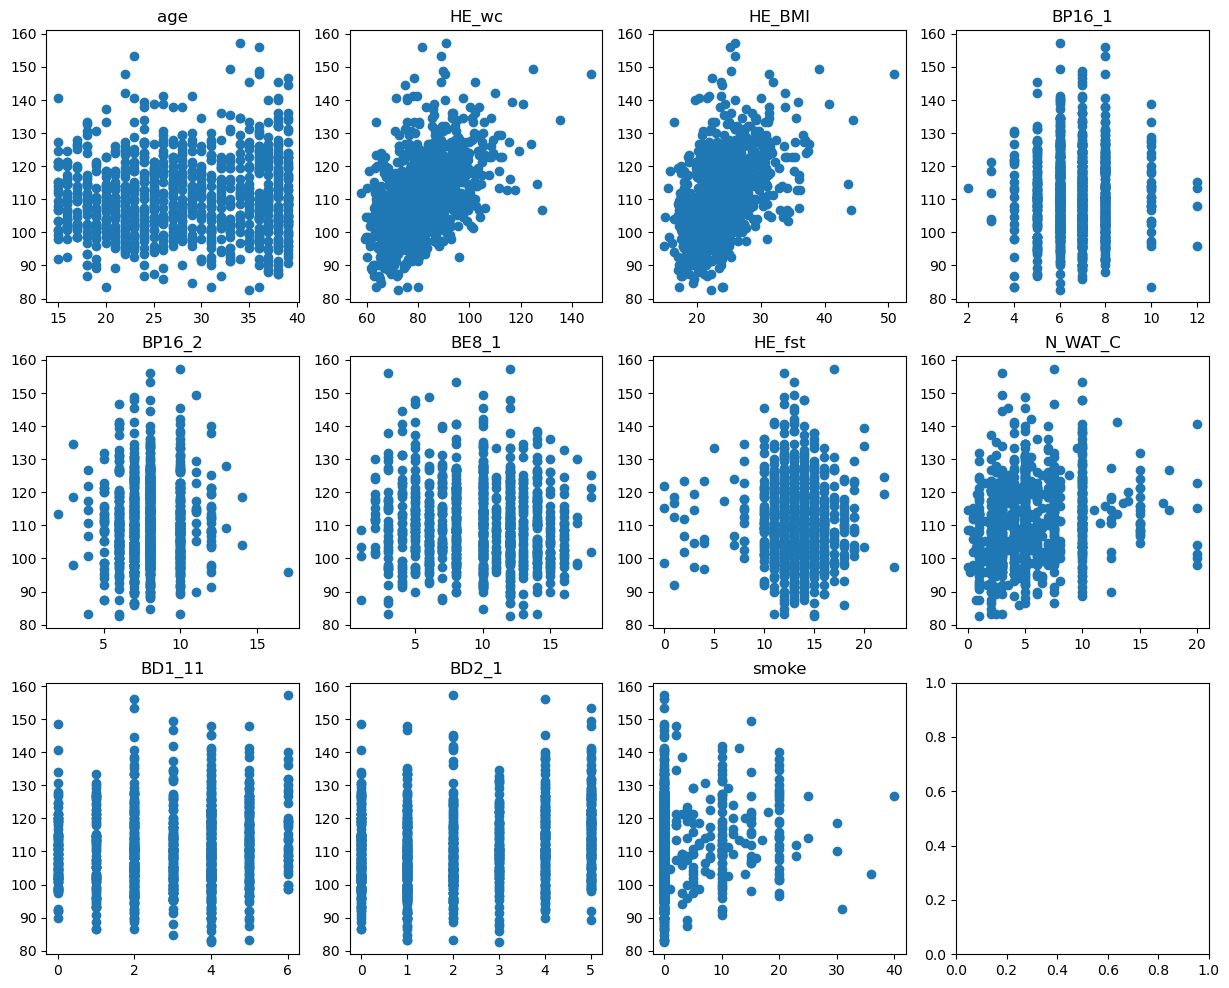

In [25]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
for i in range(len(num_col)):
    axes[i//4,i%4].scatter(data[num_col].iloc[:,i], data.loc[:,'HE_sbp'])
    axes[i//4,i%4].set_title(num_col[i])
plt.show()

#### 2. 범주형 변수

- countplot

C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is depr

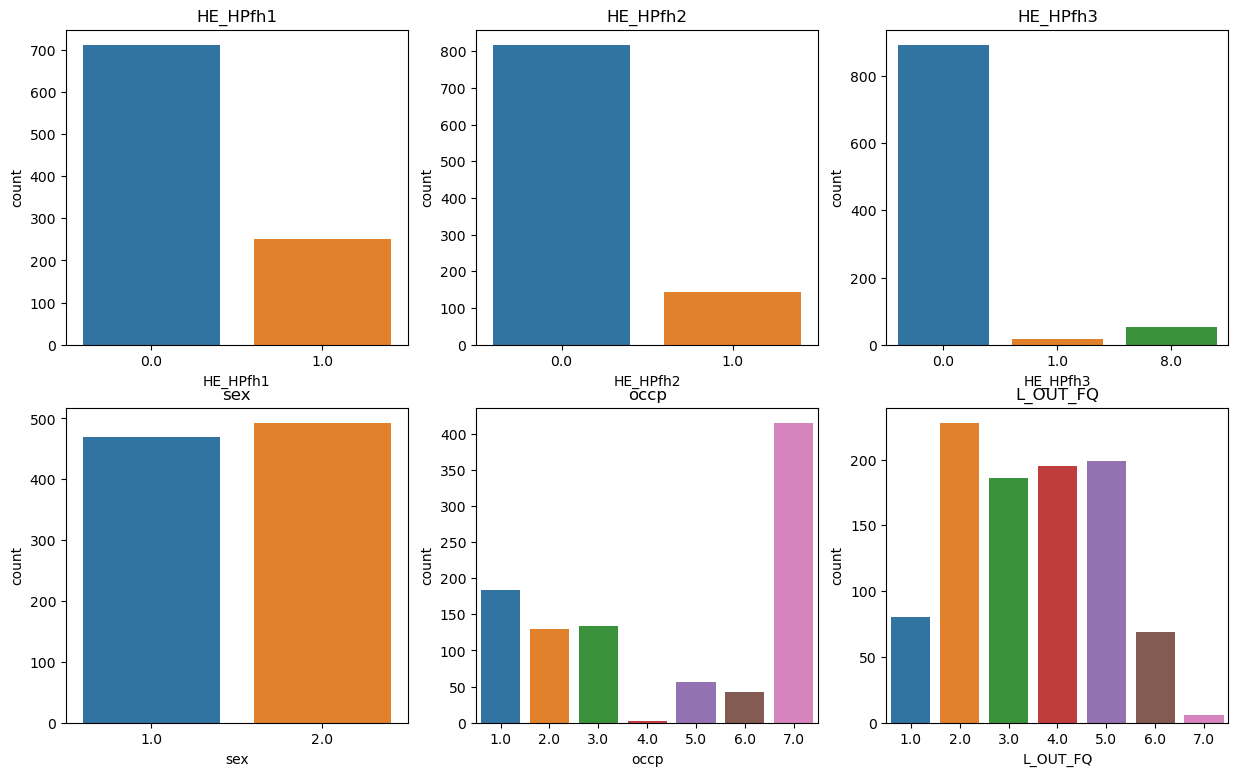

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
for i in range(len(cat_col)):
    sns.countplot(x = cat_col[i], data = data, ax = axes[i//3,i%3])
    axes[i//3,i%3].set_title(cat_col[i])
plt.show()

- boxplot

C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\YE\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is depr

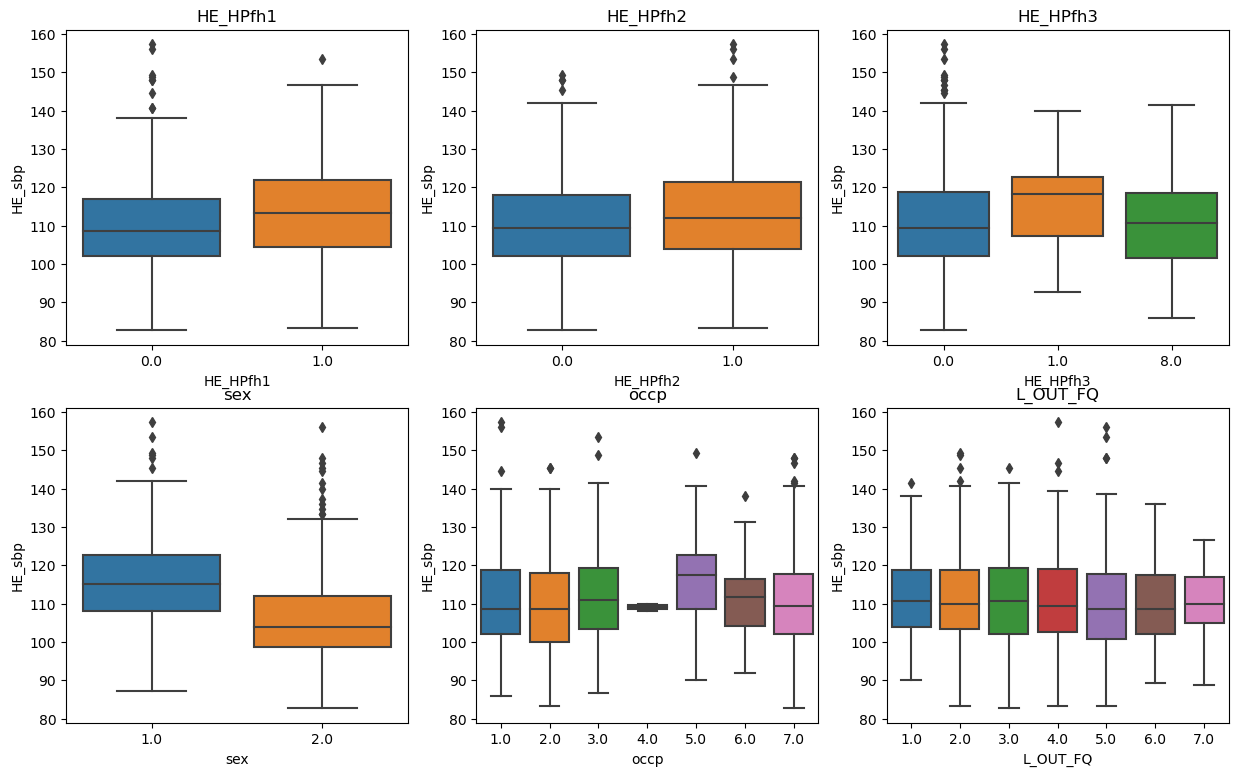

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
for i in range(len(cat_col)):
    sns.boxplot(x = data[cat_col[i]], y = data['HE_sbp'], ax = axes[i//3,i%3])
    axes[i//3,i%3].set_title(cat_col[i])
plt.show()

## 3. 생활습관 변수
- 개인정보의 `occp`(직업분야)와 생활습관 9개 변수(총 10개)를 대상
    - `occp`(직업분야) 변수가 생활습관에 영향을 미칠 것이라 판단하여, 이를 생활습관 변수와 함께 군집분석 및 요인분석 진행.

In [28]:
# 직업분야 & 생활습관 변수
x = data.iloc[:,7:-1]
x.head()

,occp,BP16_1,BP16_2,BE8_1,HE_fst,L_OUT_FQ,N_WAT_C,BD1_11,BD2_1,smoke
0,2.0,6.0,7.0,10.0,13.0,3.0,10.0,3.0,3.0,0.0
1,2.0,7.0,7.0,11.0,13.0,5.0,1.0,1.0,0.0,0.0
2,7.0,7.0,10.0,13.0,15.0,1.0,4.0,4.0,1.0,0.0
3,2.0,7.0,7.0,10.0,3.0,4.0,2.0,2.0,2.0,0.0
5,1.0,8.0,10.0,12.0,15.0,4.0,5.0,4.0,5.0,0.0


In [29]:
from sklearn.preprocessing import StandardScaler

x_s = StandardScaler().fit_transform(x)
x_s = pd.DataFrame(x_s, columns=x.columns, index=x.index)

In [30]:
lb = ['직업분야', '주중하루평균수면시간', '주말하루평균수면시간', '하루평균앉아서보내는시간', '공복시간',
      '외식횟수', '물섭취량(컵)', '1년간음주빈도', '한번에마시는음주량', '하루흡연량']

### 3.1. 군집분석

In [31]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

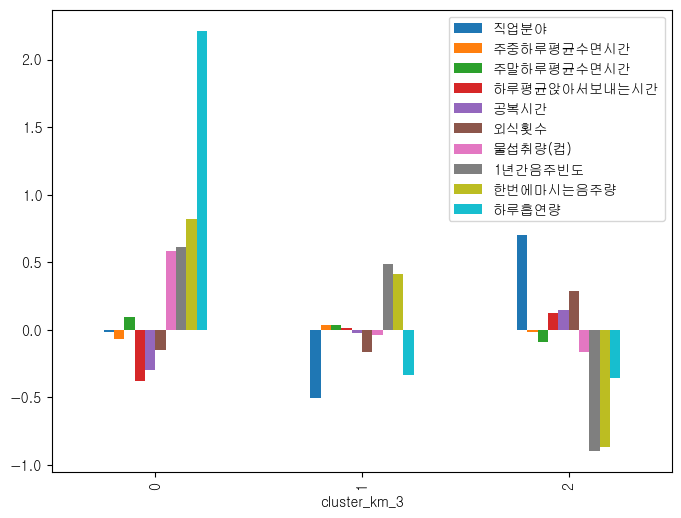

In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(x_s)
x_s['cluster_km_3']=km.labels_
x_s['cluster_km_3']=x_s['cluster_km_3'].astype('category')

x_s.groupby('cluster_km_3').mean().plot.bar(figsize=(8, 6))
plt.legend(bbox_to_anchor = (1,1), labels = lb)
plt.show()

In [33]:
km.cluster_centers_

array([[-0.01737515, -0.07088373,  0.09256175, -0.37769395, -0.29947521,
        -0.15182596,  0.57994712,  0.61153909,  0.82319541,  2.2143198 ],
       [-0.50538456,  0.03303008,  0.03890258,  0.01110343, -0.02716132,
        -0.16634335, -0.0371508 ,  0.48674264,  0.41117588, -0.33677215],
       [ 0.70043911, -0.01910431, -0.08770391,  0.12463921,  0.14821519,
         0.28465775, -0.16377903, -0.89490039, -0.86952187, -0.3576564 ]])

### 3.2. 요인분석

In [34]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, rotation='promax').fit(x)
pd.DataFrame(fa.loadings_, index=lb)

,0,1,2
직업분야,-0.210843,-0.030618,0.187513
주중하루평균수면시간,-0.071984,0.996782,0.040152
주말하루평균수면시간,-0.050517,0.451355,-0.117994
하루평균앉아서보내는시간,-0.177284,-0.065113,-0.135059
공복시간,-0.044507,-0.015201,0.088412
외식횟수,0.136853,-0.076957,1.026385
물섭취량(컵),0.177587,-0.064229,-0.021109
1년간음주빈도,0.829068,0.020215,0.038485
한번에마시는음주량,0.800138,0.027548,0.017529
하루흡연량,0.323265,-0.043352,-0.048501


### 3.3. 새로운 변수 생성

- `Sleep`(하루평균수면시간)
    - `BP16_1`(주중하루평균수면시간)과 `BP16_2`(주말하루평균수면시간)의 평균
- `Drink`(평균 음주량)
    - `BD1_11`(1년간 음주빈도)과 `BD2_1`(한번에 마시는 음주량)을 곱으로 통합.
- `occp_yn`(직업유무)
    - `occp`(직업분야)에서 '무직'에 해당하는 7은 0으로, 나머지는 1로 통합.
- `L_OUT`(외식횟수빈번정도)
    - `L_OUT_FQ`(외식횟수)의 7개 범주를 3개 범주로 축소.

In [35]:
data.insert(loc=17, column = 'Sleep', value = np.mean([data['BP16_1'], data['BP16_2']], axis = 0))
data.insert(loc=17, column = 'Drink', value = data['BD1_11'] * data['BD2_1'])
data.insert(loc=17, column = 'occp_yn', value = [0 if d == 7 else 1 for d in data['occp']])
data.insert(loc=17, column = 'L_OUT', value = [0 if d >= 6 else 1 if d >= 4 else 2 for d in data['L_OUT_FQ']])

In [36]:
data = data.drop(labels=['BP16_1','BP16_2','BD1_11','BD2_1','occp','L_OUT_FQ'], axis = 1)

In [37]:
cat_col = ['HE_HPfh1', 'HE_HPfh2', 'HE_HPfh3', 'sex', 'occp_yn', 'L_OUT']
cat_dic = {}
for col in cat_col:
    cat_dic[col] = 'category'
data = data.astype(cat_dic)

In [38]:
num_col = []
for col in data.columns[:-1]:
    if (data[col].dtype != 'category'):
        num_col.append(col)

In [39]:
data.head()

,HE_HPfh1,HE_HPfh2,HE_HPfh3,sex,age,HE_wc,HE_BMI,BE8_1,HE_fst,N_WAT_C,smoke,L_OUT,occp_yn,Drink,Sleep,HE_sbp
0,0.0,0.0,0.0,1.0,39.0,85.8,24.185489,10.0,13.0,10.0,0.0,2,1,9.0,6.5,116.666667
1,0.0,0.0,0.0,2.0,39.0,68.0,17.935939,11.0,13.0,1.0,0.0,1,1,0.0,7.0,96.000000
2,0.0,0.0,0.0,1.0,18.0,63.5,16.398308,13.0,15.0,4.0,0.0,2,0,4.0,8.5,133.333333
3,0.0,0.0,0.0,2.0,39.0,68.5,18.940652,10.0,3.0,2.0,0.0,1,1,4.0,7.0,104.666667
5,0.0,0.0,0.0,2.0,26.0,82.0,22.864261,12.0,15.0,5.0,0.0,1,1,20.0,9.0,121.333333


In [40]:
data.shape

(963, 16)

## 4. 분석

In [41]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

## 4.1. 회귀분석 1차 모델

### 4.1.1. 결과

In [42]:
fml = "HE_sbp ~" + " + ".join(data.columns[:-1])
model_full = smf.ols(fml, data = data).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HE_sbp   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     31.49
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           3.44e-80
Time:                        14:28:06   Log-Likelihood:                -3538.2
No. Observations:                 963   AIC:                             7112.
Df Residuals:                     945   BIC:                             7200.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          84.6730      4.206     20.134      0.000      76.420      92.926
HE_HPfh1[T.1.0]     3.6610      0.721      5.075      0.000       2.245       5.077
HE_HPfh2[T.1.0]     4.0315      0.886      4.553      0.000       2.294       5.769
HE_HPfh3[T.1.0]    -0.5181      2.489     -0.208      0.835      -5.403       4.367
HE_HPfh3[T.8.0]    -1.5299      1.361     -1.124      0.261      -4.201       1.141
sex[T.2.0]         -6.4185      0.830     -7.737      0.000      -8.046      -4.791
L_OUT[T.1]         -0.2276      1.220     -0.186      0.852      -2.622       2.167
L_OUT[T.2]         -0.1805      1.218     -0.148      0.882      -2.571       2.210
occp_yn[T.1]       -1.2023      0.712     -1.688      0.092      -2.600       0.195
age                 0.0077      0.052      0.148      0.882      -0.094       0.109
HE_wc               0.0637      0.086      0.743      0.458      -0.105       0.232
HE_BMI              0.8466      0.218      3.881      0.000       0.418       1.275
BE8_1              -0.1362      0.089     -1.529      0.127      -0.311       0.039
HE_fst             -0.2040      0.118     -1.727      0.084      -0.436       0.028
N_WAT_C             0.2096      0.096      2.189      0.029       0.022       0.398
smoke              -0.0530      0.063     -0.848      0.397      -0.176       0.070
Drink               0.1659      0.042      3.926      0.000       0.083       0.249
Sleep               0.6658      0.253      2.631      0.009       0.169       1.162
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.543
Skew:                           0.644   Prob(JB):                     6.67e-27
Kurtosis:                       4.159   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 해석
    - `HE_HPfh3`, `L_OUT`, `age`, `HE_wc`, `smoke` 변수의 회귀계수에 대한 p-value값이 크므로 제거가 필요. 

### 4.1.2. 최상의 부분집합 선택

- 1차 모델 adjust_R-square 기준 데이터 선별

In [43]:
import itertools
import time
import statsmodels.api as sm

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X_model = X[list(('Intercept',)+feature_set)]
    model = sm.OLS(y, X_model)
    regr = model.fit()
    RSS = (regr.resid ** 2).sum()
    return {"model":regr, "RSS":RSS, "AIC": regr.aic, 
             "BIC": regr.bic, "adj_r2": regr.rsquared_adj,
             "r2":regr.rsquared}

def getBest(k, best = "AIC"):
    
    tic = time.time()   
    results = []
    
    for combo in itertools.combinations(X.columns[1:], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    if best=="adj_r2" or best=="r2":
        best_model = models.loc[models[best].argmax()]
    else: 
        best_model = models.loc[models[best].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [44]:
import patsy
y, X = patsy.dmatrices(fml, data = data, return_type='dataframe')

In [45]:
models_best = pd.DataFrame(columns=["model", "RSS","AIC","BIC","adj_r2", "r2"])

for i in range(1,X.shape[1]-1):
    models_best.loc[i] = getBest(i, best = "adj_r2")

Processed 17 models on 1 predictors in 0.0680990219116211 seconds.
Processed 136 models on 2 predictors in 0.5438790321350098 seconds.
Processed 680 models on 3 predictors in 3.0194923877716064 seconds.
Processed 2380 models on 4 predictors in 10.121593713760376 seconds.
Processed 6188 models on 5 predictors in 28.363751888275146 seconds.
Processed 12376 models on 6 predictors in 58.21402859687805 seconds.
Processed 19448 models on 7 predictors in 102.83321452140808 seconds.
Processed 24310 models on 8 predictors in 151.46890807151794 seconds.
Processed 24310 models on 9 predictors in 186.21385788917542 seconds.
Processed 19448 models on 10 predictors in 174.91659593582153 seconds.
Processed 12376 models on 11 predictors in 98.04889178276062 seconds.
Processed 6188 models on 12 predictors in 49.35806751251221 seconds.
Processed 2380 models on 13 predictors in 15.21830940246582 seconds.
Processed 680 models on 14 predictors in 3.9769608974456787 seconds.
Processed 136 models on 15 predi

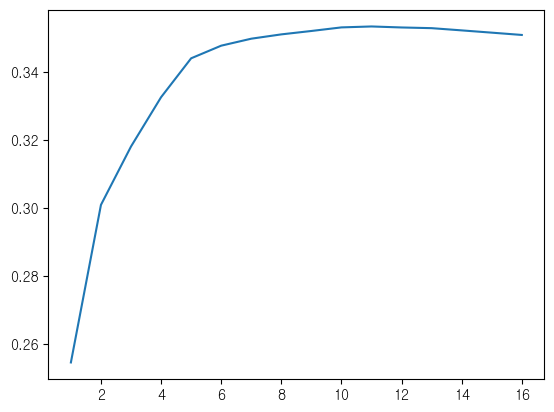

In [46]:
plt.plot(models_best['adj_r2'])
plt.show()

- 최종 선별 변수의 모델

In [47]:
model_final = models_best.iloc[models_best['adj_r2'].astype('float64').argmax(), 0]

In [48]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HE_sbp   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     48.78
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           9.22e-85
Time:                        14:43:41   Log-Likelihood:                -3538.9
No. Observations:                 963   AIC:                             7102.
Df Residuals:                     951   BIC:                             7160.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          86.4487      3.281     26.349      0.000      80.010      92.887
HE_HPfh1[T.1.0]     3.6721      0.713      5.151      0.000       2.273       5.071
HE_HPfh2[T.1.0]     4.0908      0.873      4.685      0.000       2.377       5.804
HE_HPfh3[T.8.0]    -1.6004      1.351     -1.185      0.236      -4.251       1.050
sex[T.2.0]         -6.6437      0.680     -9.773      0.000      -7.978      -5.310
occp_yn[T.1]       -1.1711      0.649     -1.804      0.072      -2.445       0.103
HE_BMI              0.9958      0.075     13.303      0.000       0.849       1.143
BE8_1              -0.1375      0.086     -1.598      0.110      -0.306       0.031
HE_fst             -0.1948      0.116     -1.675      0.094      -0.423       0.033
N_WAT_C             0.2006      0.095      2.114      0.035       0.014       0.387
Drink               0.1577      0.041      3.875      0.000       0.078       0.238
Sleep               0.6433      0.249      2.587      0.010       0.155       1.131
==============================================================================
Omnibus:                       83.004   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.688
Skew:                           0.646   Prob(JB):                     1.39e-27
Kurtosis:                       4.189   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.1.3. 최종 선별 변수 모델

#### 1. 최종 선별 변수

In [50]:
data_model = data[['HE_HPfh1','HE_HPfh2','sex', 'occp_yn', 'HE_BMI', 'BE8_1',
                   'HE_fst','N_WAT_C','Sleep','Drink','HE_sbp']]

#### 2. 결과

In [51]:
fml_fn = "HE_sbp ~" + " + ".join(data_model.columns[:-1])
model_fn = smf.ols(fml_fn, data = data_model).fit()
model_fn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HE_sbp   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     53.49
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           2.45e-85
Time:                        14:44:09   Log-Likelihood:                -3539.6
No. Observations:                 963   AIC:                             7101.
Df Residuals:                     952   BIC:                             7155.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          86.3466      3.280     26.322      0.000      79.909      92.784
HE_HPfh1[T.1.0]     3.6334      0.712      5.101      0.000       2.235       5.031
HE_HPfh2[T.1.0]     4.0992      0.873      4.694      0.000       2.385       5.813
sex[T.2.0]         -6.6043      0.679     -9.725      0.000      -7.937      -5.272
occp_yn[T.1]       -1.1349      0.649     -1.750      0.080      -2.408       0.138
HE_BMI              0.9986      0.075     13.346      0.000       0.852       1.145
BE8_1              -0.1375      0.086     -1.598      0.110      -0.306       0.031
HE_fst             -0.1977      0.116     -1.700      0.090      -0.426       0.031
N_WAT_C             0.2001      0.095      2.109      0.035       0.014       0.386
Sleep               0.6374      0.249      2.564      0.011       0.149       1.125
Drink               0.1572      0.041      3.863      0.000       0.077       0.237
==============================================================================
Omnibus:                       83.187   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.580
Skew:                           0.648   Prob(JB):                     1.46e-27
Kurtosis:                       4.183   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

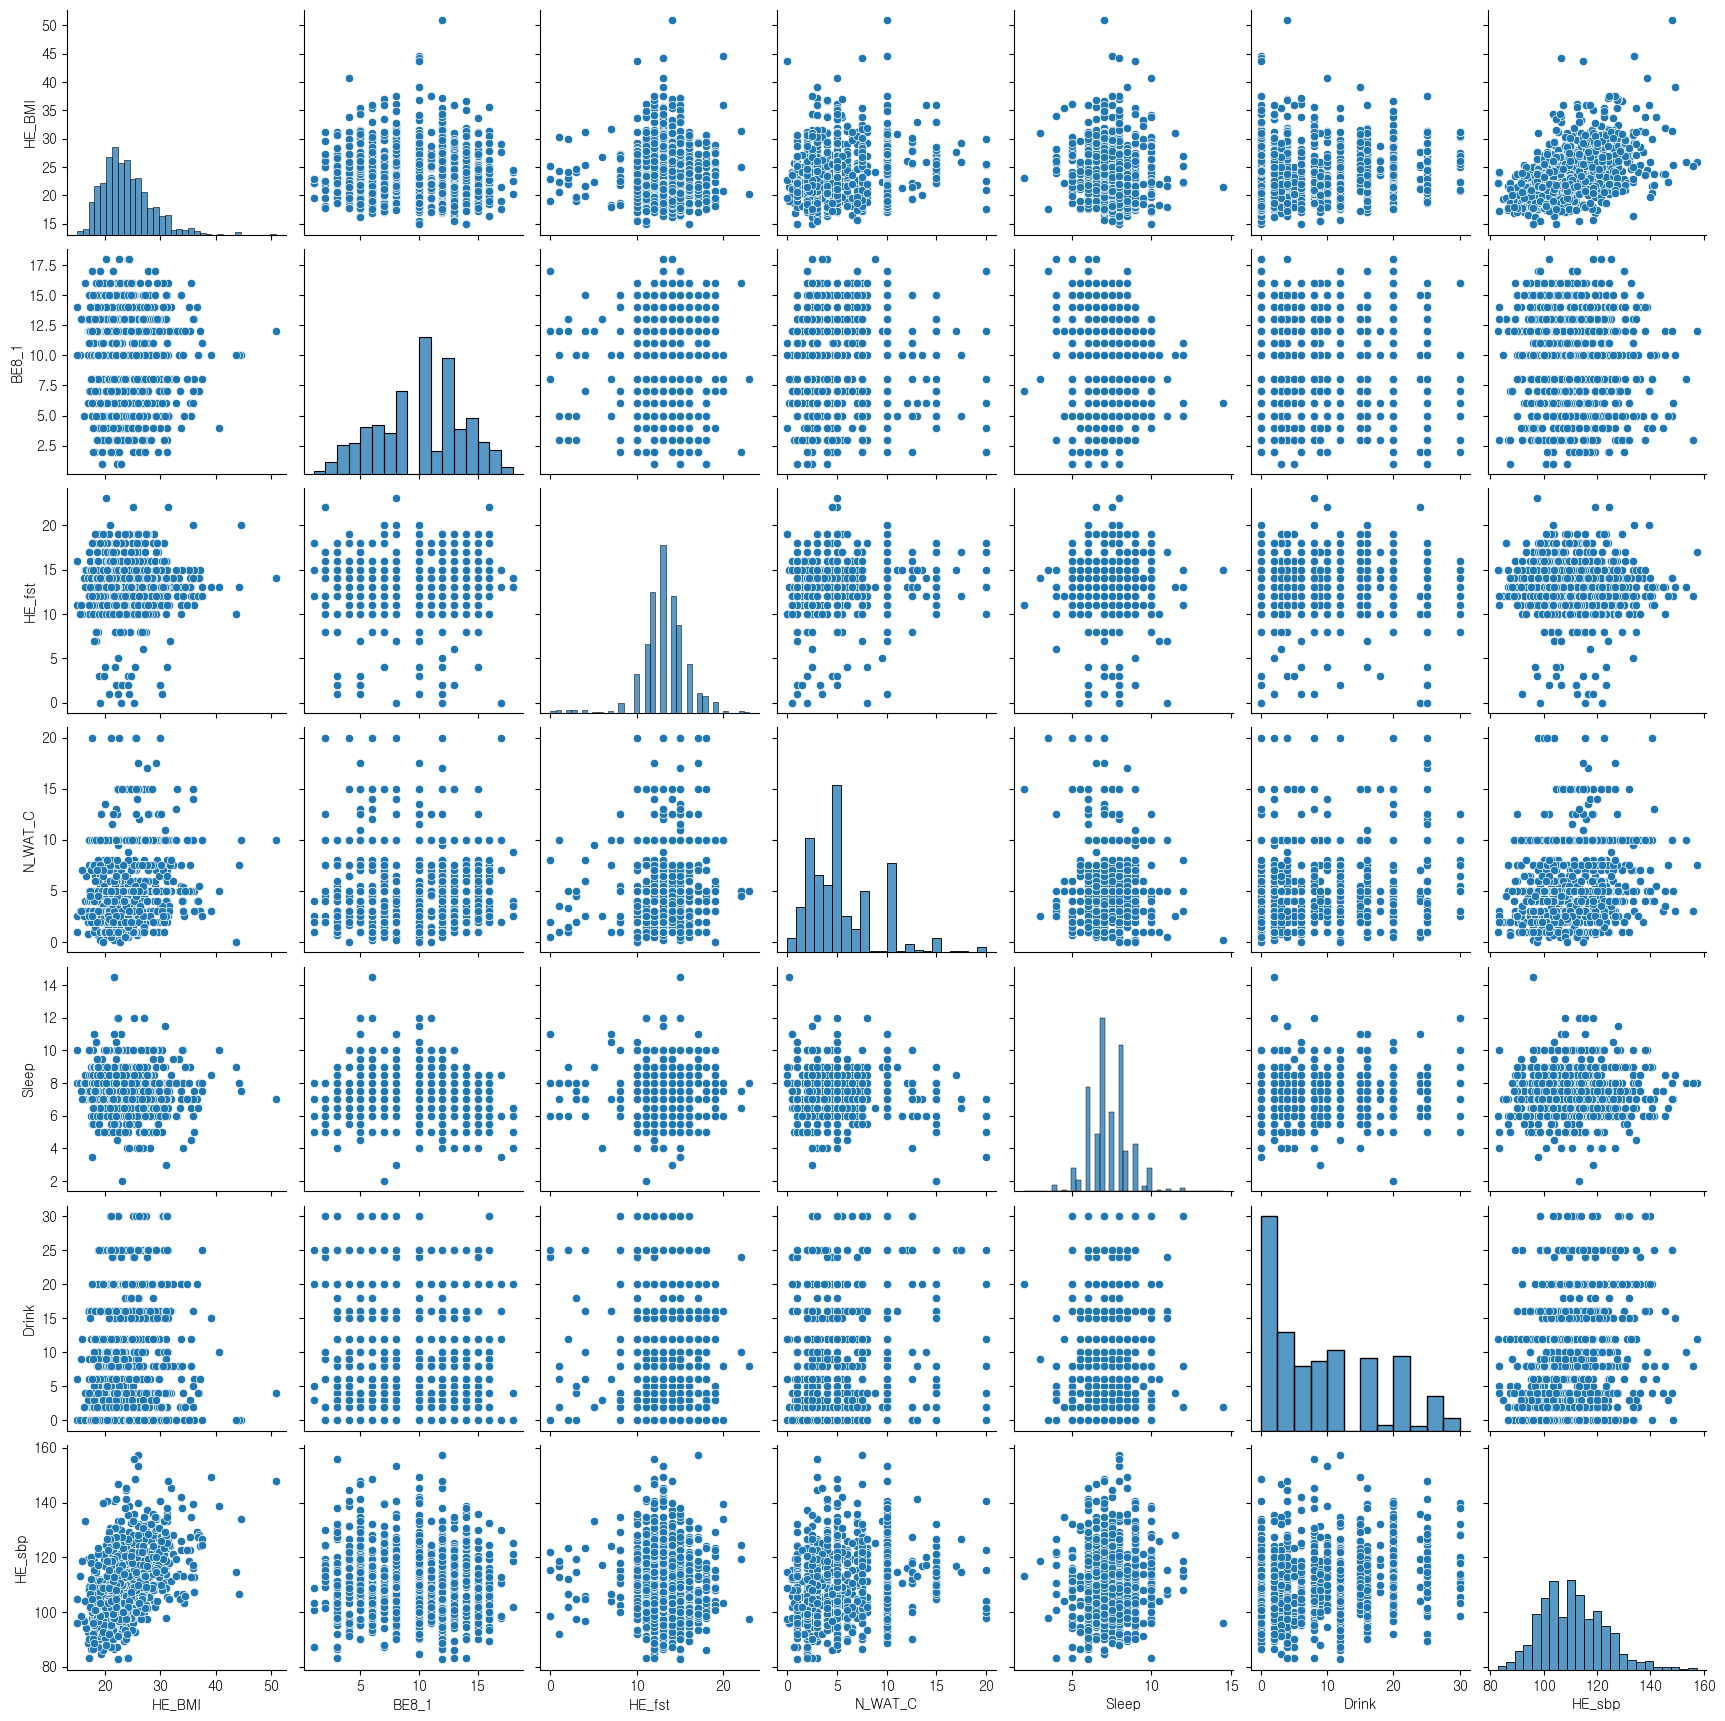

In [52]:
sns.pairplot(data_model)
plt.show()

## 4.2. 회귀진단
### 4.2.1. 데이터의 비선형성
- 잔차그래프 확인

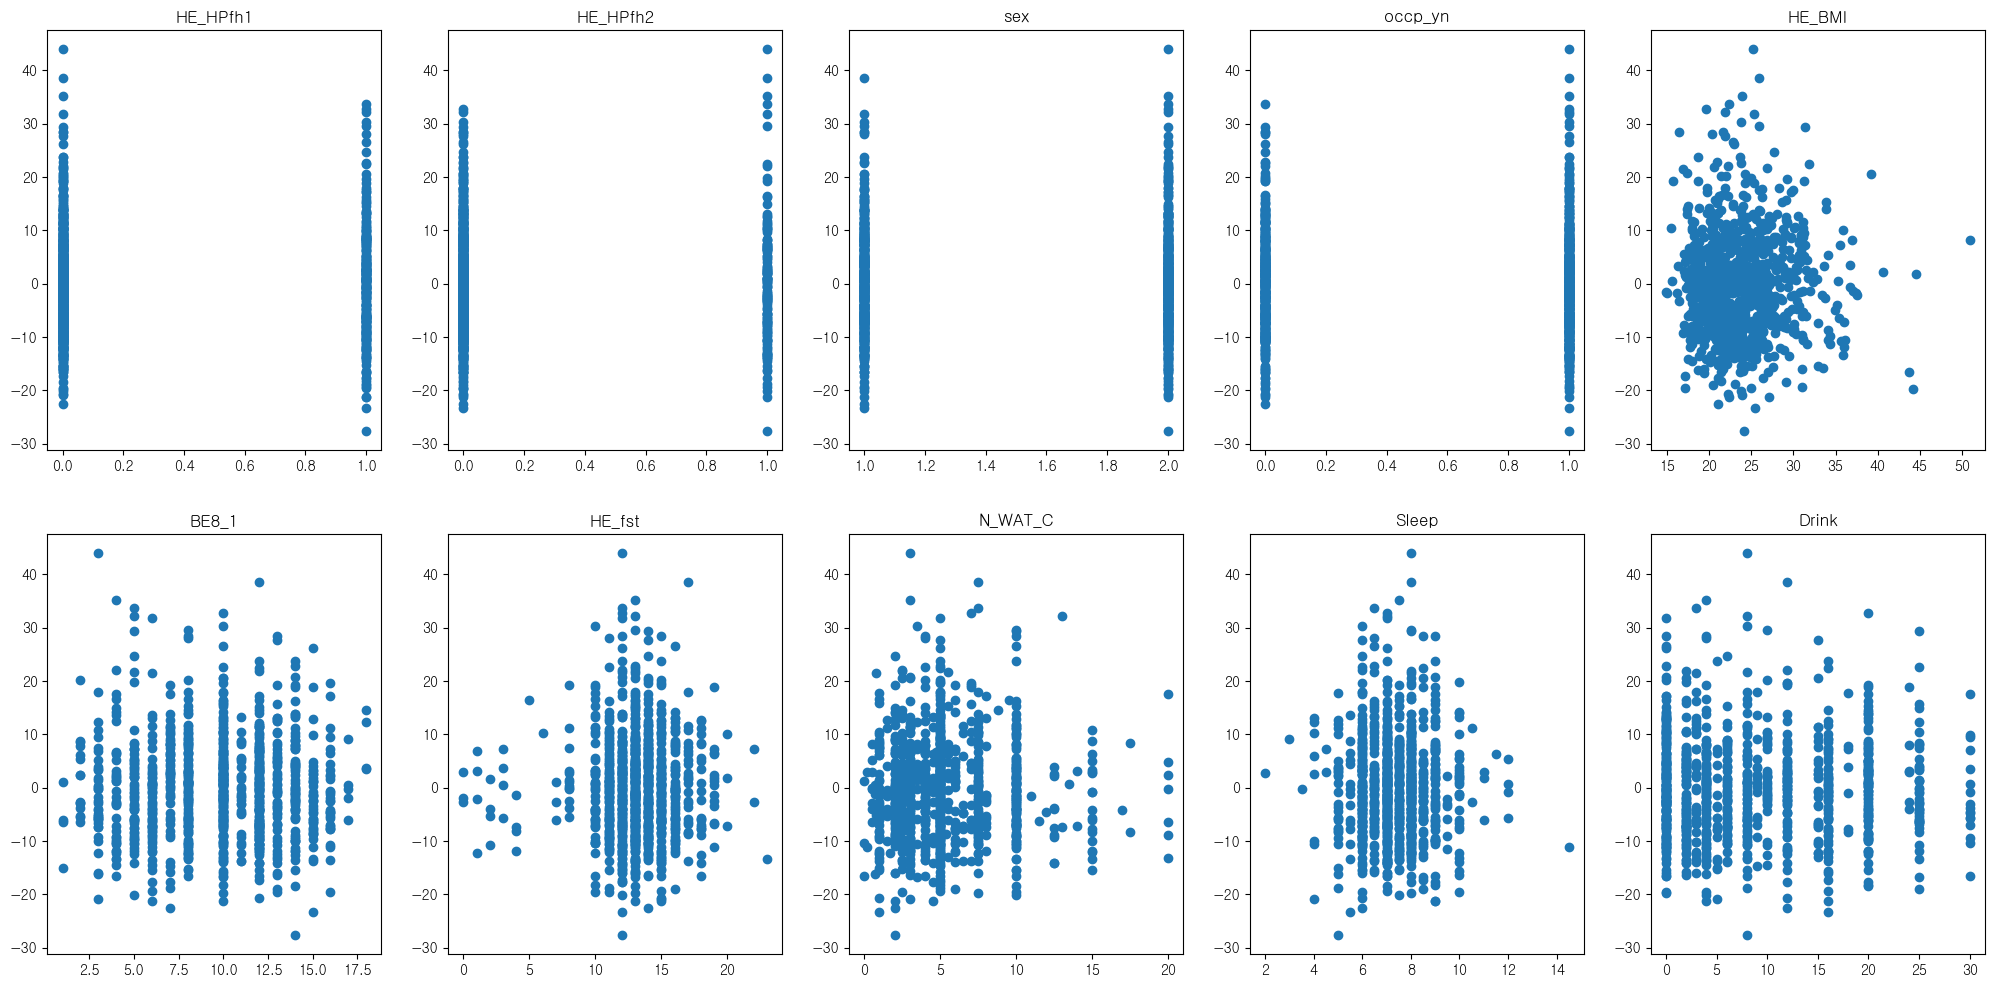

In [53]:
fig, axes = plt.subplots(2, 5, figsize=(25, 12))
for i in range(len(data_model.columns[:-1])):
    axes[i//5,i%5].scatter(data_model.iloc[:,i], model_fn.resid)
    axes[i//5,i%5].set_title(data_model.columns[i])
plt.show()

- Autocorrelation 확인

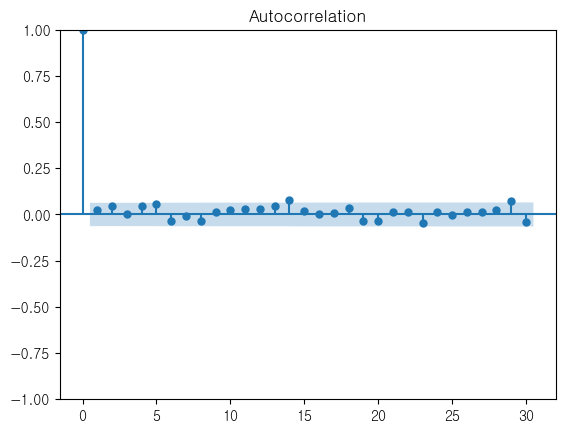

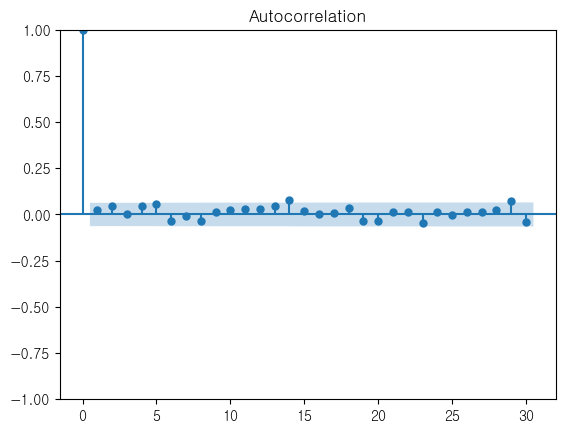

In [54]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(model_fn.resid)

### 4.2.2. 오차항의 상관성
- Durbin-Watson 통계량

In [55]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_fn.resid)

1.9474486149709564

- 결과
    - $D \approx 2$이므로 $No AutoCorrelation$

### 4.2.3. 오차항의 이분산성

In [56]:
fml_BMI_log = "HE_sbp ~" + " + ".join(data_model.columns[:4]) + " + np.log(HE_BMI) + " + " + ".join(data_model.columns[5:-1])
model_BMI_log = smf.ols(fml_BMI_log, data = data_model).fit()
model_BMI_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HE_sbp   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     52.90
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.59e-84
Time:                        14:44:53   Log-Likelihood:                -3541.5
No. Observations:                 963   AIC:                             7105.
Df Residuals:                     952   BIC:                             7159.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          31.0097      6.654      4.660      0.000      17.951      44.068
HE_HPfh1[T.1.0]     3.5732      0.714      5.004      0.000       2.172       4.975
HE_HPfh2[T.1.0]     3.9962      0.876      4.564      0.000       2.278       5.714
sex[T.2.0]         -6.5490      0.682     -9.602      0.000      -7.888      -5.211
occp_yn[T.1]       -1.1823      0.650     -1.819      0.069      -2.458       0.093
np.log(HE_BMI)     24.9962      1.897     13.176      0.000      21.273      28.719
BE8_1              -0.1316      0.086     -1.527      0.127      -0.301       0.038
HE_fst             -0.1973      0.117     -1.693      0.091      -0.426       0.031
N_WAT_C             0.1993      0.095      2.095      0.036       0.013       0.386
Sleep               0.6817      0.249      2.735      0.006       0.193       1.171
Drink               0.1477      0.041      3.620      0.000       0.068       0.228
==============================================================================
Omnibus:                       81.800   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.312
Skew:                           0.647   Prob(JB):                     1.24e-26
Kurtosis:                       4.139   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

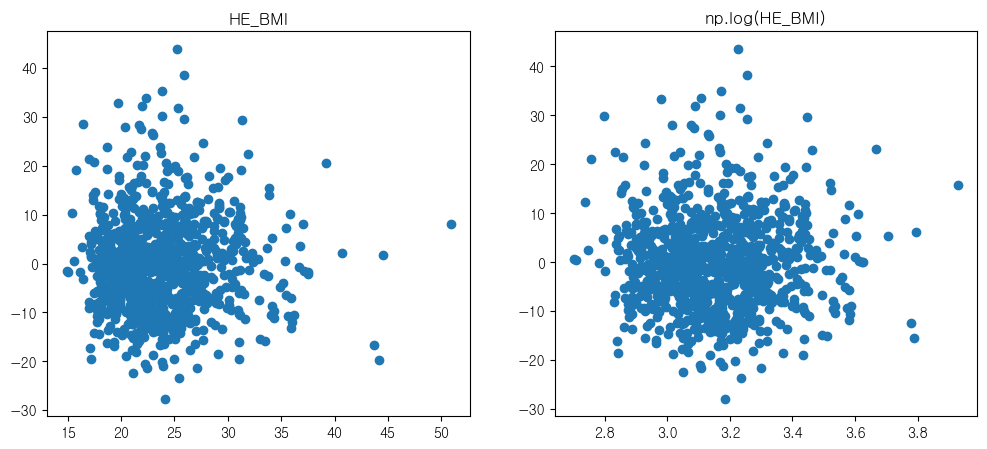

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(data_model['HE_BMI'], model_fn.resid)
axes[1].scatter(np.log(data_model['HE_BMI']), model_BMI_log.resid)
axes[0].set_title('HE_BMI')
axes[1].set_title('np.log(HE_BMI)')
plt.show()

### 4.2.4. 이상치

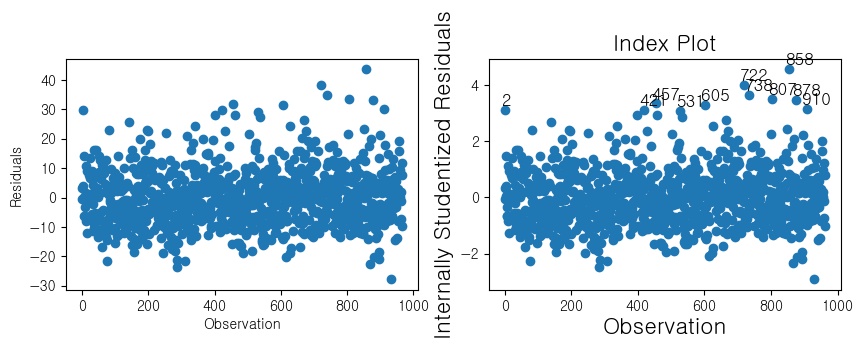

In [58]:
inf3 = OLSInfluence(model_BMI_log)
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(data_model.index, model_BMI_log.resid)
ax[0].set_xlabel('Observation') # 관측치 번호
ax[0].set_ylabel('Residuals')
inf3.plot_index('resid',threshold=3, ax = ax[1])
plt.show()

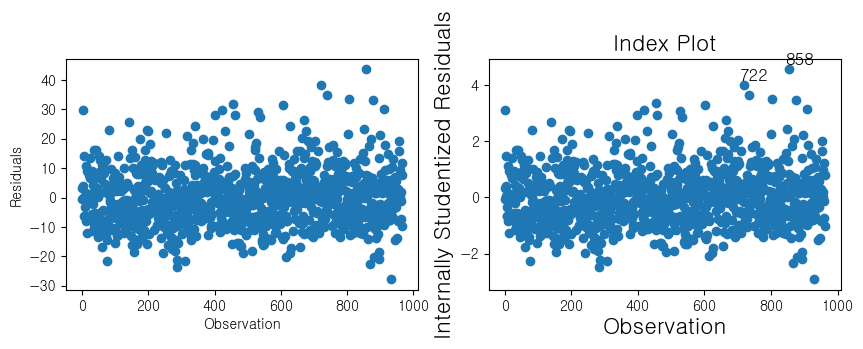

In [59]:
inf3 = OLSInfluence(model_BMI_log)
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(data_model.index, model_BMI_log.resid)
ax[0].set_xlabel('Observation') # 관측치 번호
ax[0].set_ylabel('Residuals')
inf3.plot_index('resid',threshold=4, ax = ax[1])
plt.show()

In [60]:
inf_idx = [722, 858]
data_model.loc[inf_idx, :]

,HE_HPfh1,HE_HPfh2,sex,occp_yn,HE_BMI,BE8_1,HE_fst,N_WAT_C,Sleep,Drink,HE_sbp
722,0.0,1.0,1.0,1,25.939829,12.0,17.0,7.5,8.0,12.0,157.333333
858,0.0,1.0,2.0,1,25.200256,3.0,12.0,3.0,8.0,8.0,156.000000


### 4.2.5. 영향점

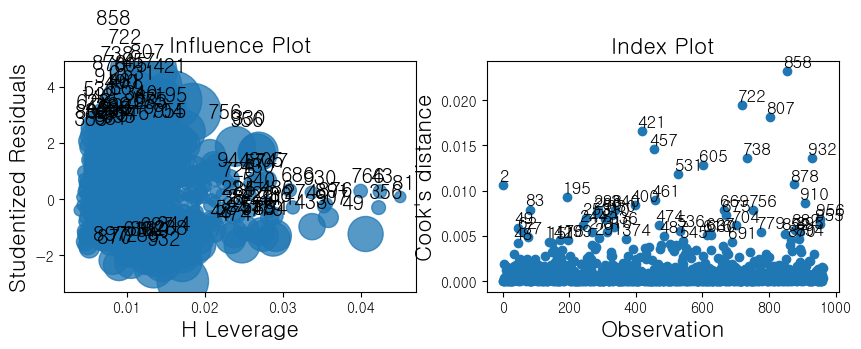

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10, 3))
inf3.plot_influence(ax = ax[0])
inf3.plot_index('cook',threshold = 4/(model_BMI_log.nobs-2-1), ax=ax[1])
plt.show()

In [62]:
data_model['mark'] = 0
data_model.loc[data_model.index.isin(inf_idx), 'mark'] = 1
data_model.head()

C:\Users\YE\AppData\Local\Temp\ipykernel_4860\2661662752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['mark'] = 0


,HE_HPfh1,HE_HPfh2,sex,occp_yn,HE_BMI,BE8_1,HE_fst,N_WAT_C,Sleep,Drink,HE_sbp,mark
0,0.0,0.0,1.0,1,24.185489,10.0,13.0,10.0,6.5,9.0,116.666667,0
1,0.0,0.0,2.0,1,17.935939,11.0,13.0,1.0,7.0,0.0,96.000000,0
2,0.0,0.0,1.0,0,16.398308,13.0,15.0,4.0,8.5,4.0,133.333333,0
3,0.0,0.0,2.0,1,18.940652,10.0,3.0,2.0,7.0,4.0,104.666667,0
5,0.0,0.0,2.0,1,22.864261,12.0,15.0,5.0,9.0,20.0,121.333333,0


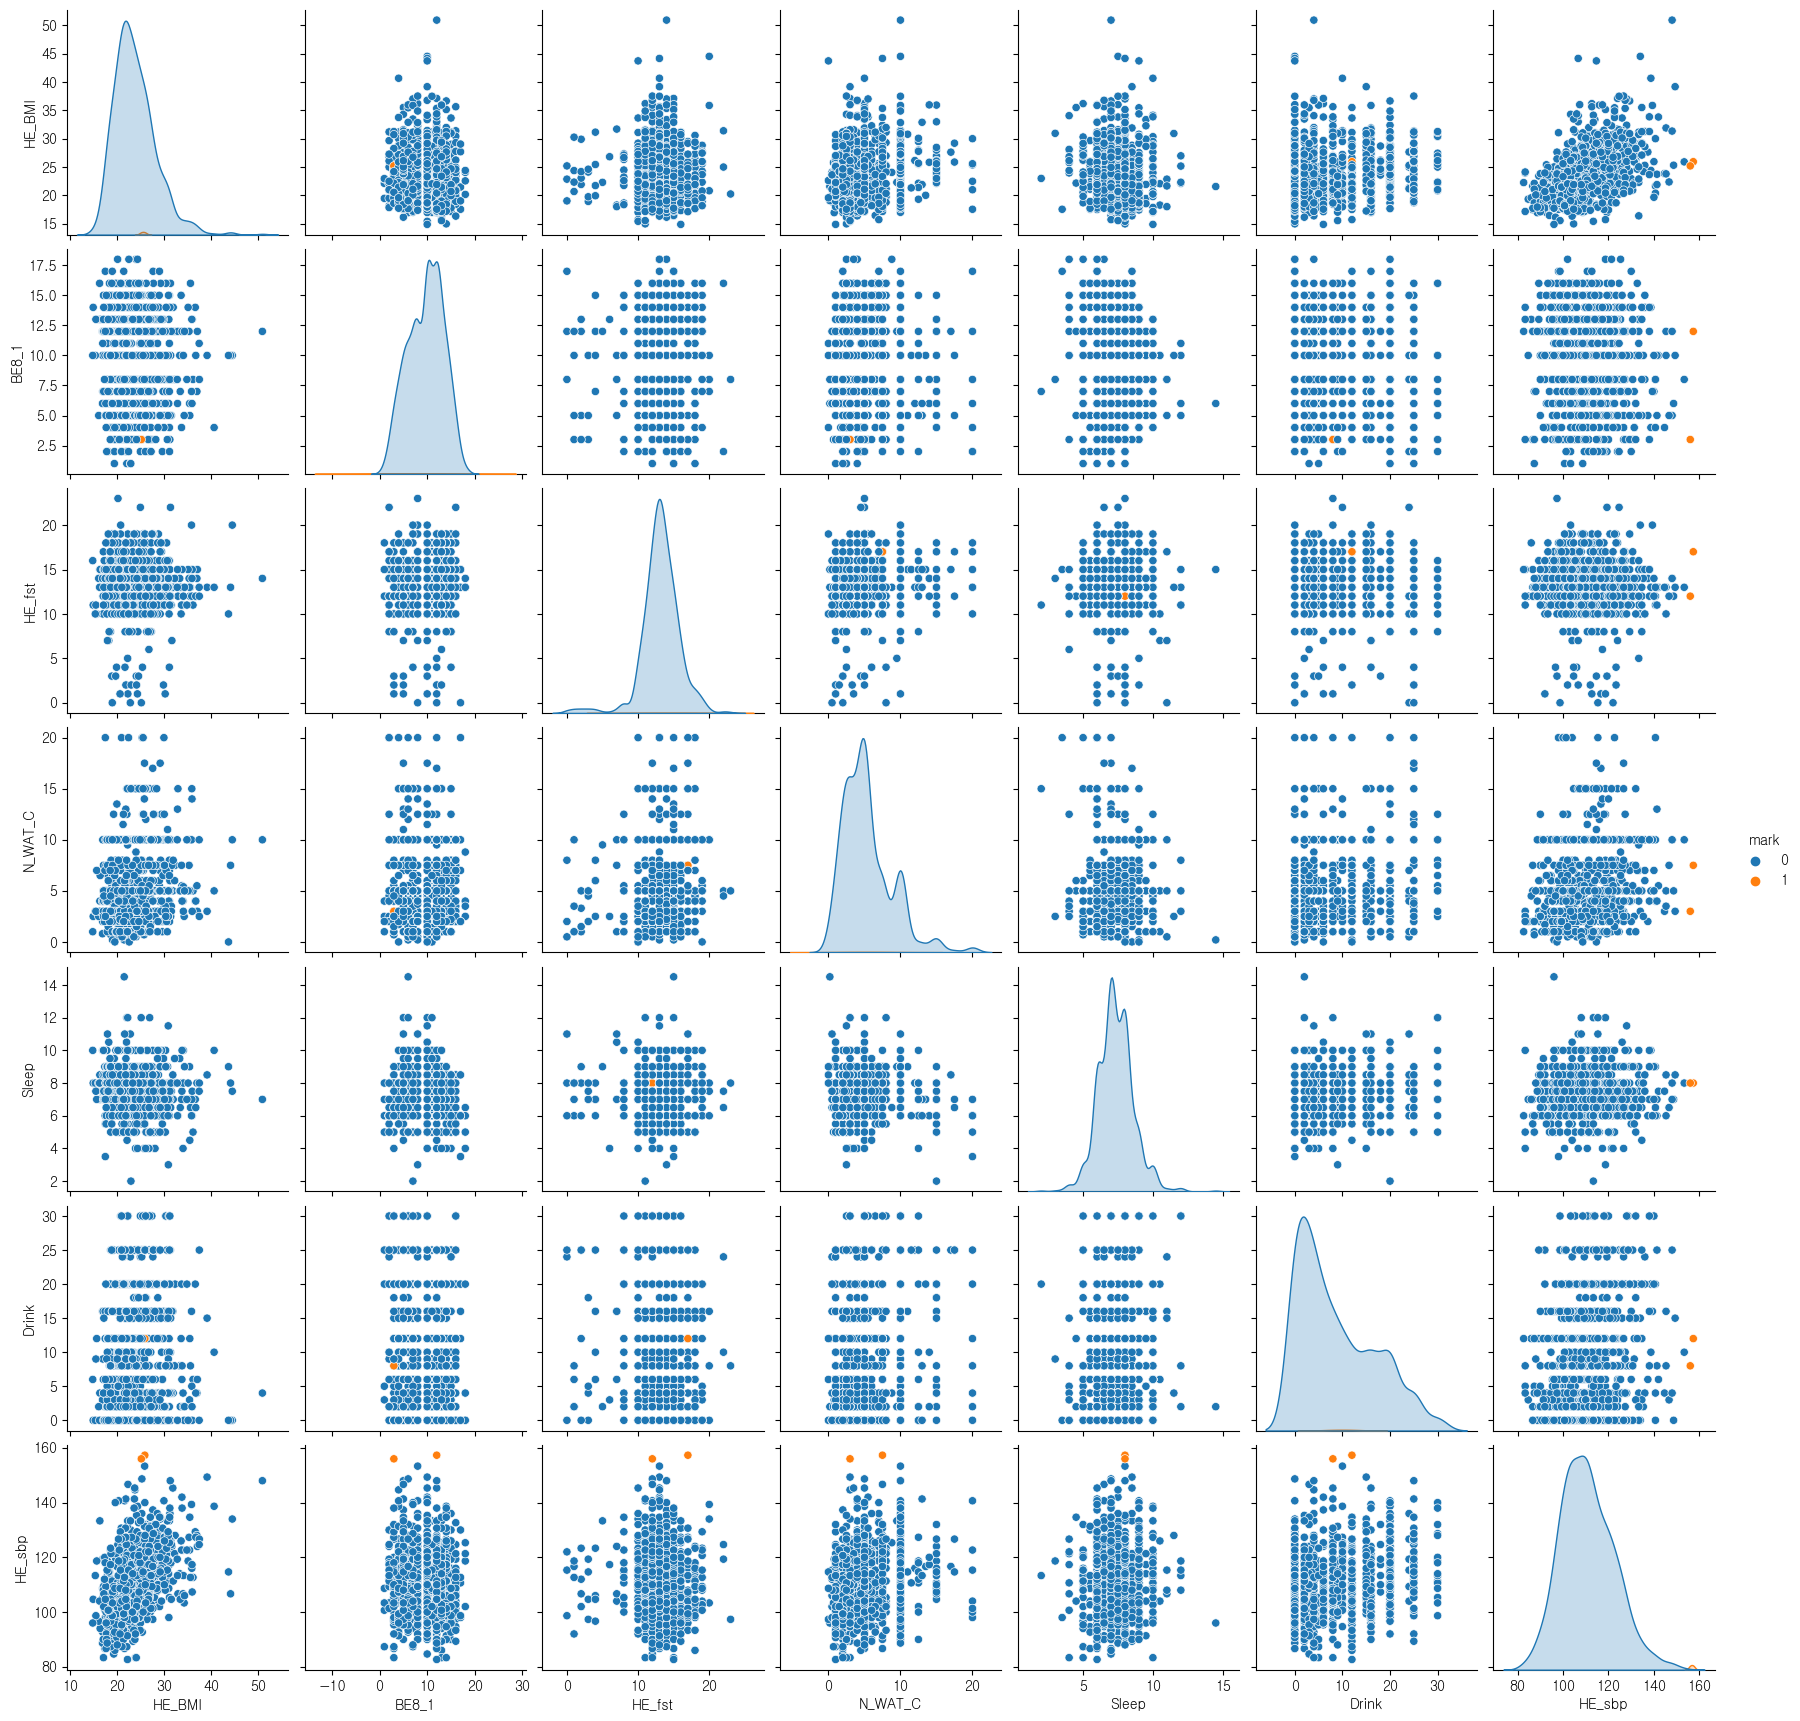

In [63]:
sns.pairplot(data_model, hue = 'mark')
plt.show()

### 4.2.6. 다중공선성
VIF(분산팽창인수)

In [64]:
import patsy
y, X = patsy.dmatrices(fml_BMI_log, data_model, return_type='matrix')

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 460.22546948012223
VIF of HE_HPfh1[T.1.0] : 1.0212782434814296
VIF of HE_HPfh2[T.1.0] : 1.0189956494595194
VIF of sex[T.2.0] : 1.2081726491166374
VIF of occp_yn[T.1] : 1.0768369879464694
VIF of np.log(HE_BMI) : 1.147349606911619
VIF of BE8_1 : 1.044773275707857
VIF of HE_fst : 1.0132960118968852
VIF of N_WAT_C : 1.1142433542335177
VIF of Sleep : 1.0136743124805248
VIF of Drink : 1.1227670018196012


### 4.2.7. 이상치 영향점 제거

In [65]:
data_model.shape

(963, 12)

In [66]:
data_fn = data_model.query('mark == 0').iloc[:, :-1]

In [67]:
data_fn.insert(loc=4, column='HE_BMI_log', value=np.log(data_fn.HE_BMI))
data_fn = data_fn.drop(labels='HE_BMI', axis = 1)
data_fn

,HE_HPfh1,HE_HPfh2,sex,occp_yn,HE_BMI_log,BE8_1,HE_fst,N_WAT_C,Sleep,Drink,HE_sbp
0,0.0,0.0,1.0,1,3.185753,10.0,13.0,10.0,6.5,9.0,116.666667
1,0.0,0.0,2.0,1,2.886806,11.0,13.0,1.0,7.0,0.0,96.000000
2,0.0,0.0,1.0,0,2.797178,13.0,15.0,4.0,8.5,4.0,133.333333
3,0.0,0.0,2.0,1,2.941310,10.0,3.0,2.0,7.0,4.0,104.666667
5,0.0,0.0,2.0,1,3.129575,12.0,15.0,5.0,9.0,20.0,121.333333
...,...,...,...,...,...,...,...,...,...,...,...
962,1.0,0.0,1.0,1,3.087231,12.0,18.0,10.0,6.0,2.0,104.666667
963,1.0,0.0,1.0,1,3.151932,13.0,15.0,4.0,8.0,9.0,114.000000
964,0.0,0.0,2.0,1,3.372793,10.0,15.0,5.0,5.0,3.0,120.000000
965,0.0,0.0,2.0,1,2.866239,12.0,12.0,2.5,7.0,6.0,104.666667


## 4.3. 최종 데이터 & 최종 모델

In [68]:
fml_final = "HE_sbp ~" + " + ".join(data_fn.columns[:-1])
model_final = smf.ols(fml_final, data = data_fn).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HE_sbp   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     54.06
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           4.44e-86
Time:                        14:46:05   Log-Likelihood:                -3516.1
No. Observations:                 961   AIC:                             7054.
Df Residuals:                     950   BIC:                             7108.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.1035      6.533      4.914      0.000      19.283      44.924
HE_HPfh1[T.1.0]     3.7081      0.701      5.289      0.000       2.332       5.084
HE_HPfh2[T.1.0]     3.4335      0.864      3.974      0.000       1.738       5.129
sex[T.2.0]         -6.5413      0.670     -9.765      0.000      -7.856      -5.227
occp_yn[T.1]       -1.3219      0.638     -2.071      0.039      -2.574      -0.069
HE_BMI_log         24.7858      1.862     13.310      0.000      21.131      28.440
BE8_1              -0.1241      0.085     -1.464      0.144      -0.290       0.042
HE_fst             -0.2135      0.115     -1.864      0.063      -0.438       0.011
N_WAT_C             0.2040      0.093      2.185      0.029       0.021       0.387
Sleep               0.6430      0.245      2.627      0.009       0.163       1.123
Drink               0.1484      0.040      3.705      0.000       0.070       0.227
==============================================================================
Omnibus:                       55.575   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.878
Skew:                           0.546   Prob(JB):                     1.11e-15
Kurtosis:                       3.727   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. 결론

- 앉아 있는 시간[`BE8_1`] 변수에 대한 p-vlaue 값이 0.144로 혈압에 유의미한 영향을 끼치지 않음을 확인.

- 해석
    - 해당 변수를 제외한 나머지 변수가 모두 동일한 수준일 때,
        - `HE_HPfh1[T.1.0]` : 아버지가 고혈압인 사람이 그렇지 않은 사람보다 수축기 혈압 수치가 3.71 높아진다.
        - `HE_HPfh2[T.1.0]` : 어머니가 고혈압인 사람이 그렇지 않은 사람보다 수축기 혈압 수치가 3.43 높아진다.
        - `sex[T.2.0]` : 여성이 남성보다 수축기 혈압 수치가 6.5413 낮아진다.
        - `occp_yn[T.1]` : 직업이 있는 사람이 직업이 없는 사람보다 수축기 혈압 수치가 1.32 낮아진다.
        - `HE_BMI` : HE_BMI가 1%만큼 증가할 때, 수축기 혈압 수치가 0.2479만큼 변한다.
        - `HE_fst` : 공복유지시간이 1 증가할 때, 고혈압 수치가 0.21배 감소한다
        - `N_WAT_C`: 물 섭취량이 1 증가할 때, 고혈압 수치가 0.2배 증가한다.
        - `Sleep`: 수면시간이 1증가할 때, 고혈압 수치가 0.15배 증가한다.
        - `Drink`: 음주량이 1 증가할 때, 고혈압 수치가 0.64배 증가한다.